# Multi-Echo Denoising with tedana

In [1]:
import os
import matplotlib.pyplot as plt
from glob import glob

import numpy as np
import pandas as pd
from nilearn import image, plotting
from tedana import workflows
from IPython.display import display, HTML
import json
from pprint import pprint

# Needs to come after tedana import
%matplotlib inline

/Users/taylor/Documents/tsalo/nilearn/nilearn/datasets/__init__.py:92: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
data_dir = os.path.abspath("../data")
func_dir = os.path.join(data_dir, "sub-04570/func/")
data_files = [
    os.path.join(func_dir, "sub-04570_task-rest_echo-1_space-scanner_desc-partialPreproc_bold.nii.gz"),
    os.path.join(func_dir, "sub-04570_task-rest_echo-2_space-scanner_desc-partialPreproc_bold.nii.gz"),
    os.path.join(func_dir, "sub-04570_task-rest_echo-3_space-scanner_desc-partialPreproc_bold.nii.gz"),
    os.path.join(func_dir, "sub-04570_task-rest_echo-4_space-scanner_desc-partialPreproc_bold.nii.gz"),
]
echo_times = [12., 28., 44., 60.]
mask_file = os.path.join(func_dir, "sub-04570_task-rest_space-scanner_desc-brain_mask.nii.gz")
confounds_file = os.path.join(func_dir, "sub-04570_task-rest_desc-confounds_timeseries.tsv")

out_dir = os.path.join(data_dir, "tedana")

INFO     tedana:tedana_workflow:374 Using output directory: /Users/taylor/Documents/tsalo/multi-echo-data-analysis/data/tedana
INFO     tedana:tedana_workflow:387 Loading input data: ['/Users/taylor/Documents/tsalo/multi-echo-data-analysis/data/sub-04570/func/sub-04570_task-rest_echo-1_space-scanner_desc-partialPreproc_bold.nii.gz', '/Users/taylor/Documents/tsalo/multi-echo-data-analysis/data/sub-04570/func/sub-04570_task-rest_echo-2_space-scanner_desc-partialPreproc_bold.nii.gz', '/Users/taylor/Documents/tsalo/multi-echo-data-analysis/data/sub-04570/func/sub-04570_task-rest_echo-3_space-scanner_desc-partialPreproc_bold.nii.gz', '/Users/taylor/Documents/tsalo/multi-echo-data-analysis/data/sub-04570/func/sub-04570_task-rest_echo-4_space-scanner_desc-partialPreproc_bold.nii.gz']
INFO     tedana:tedana_workflow:454 Using user-defined mask
WARNING  utils:make_adaptive_mask:108 4 voxels in user-defined mask do not have good signal. Removing voxels from mask.
INFO     tedana:tedana_workflow:

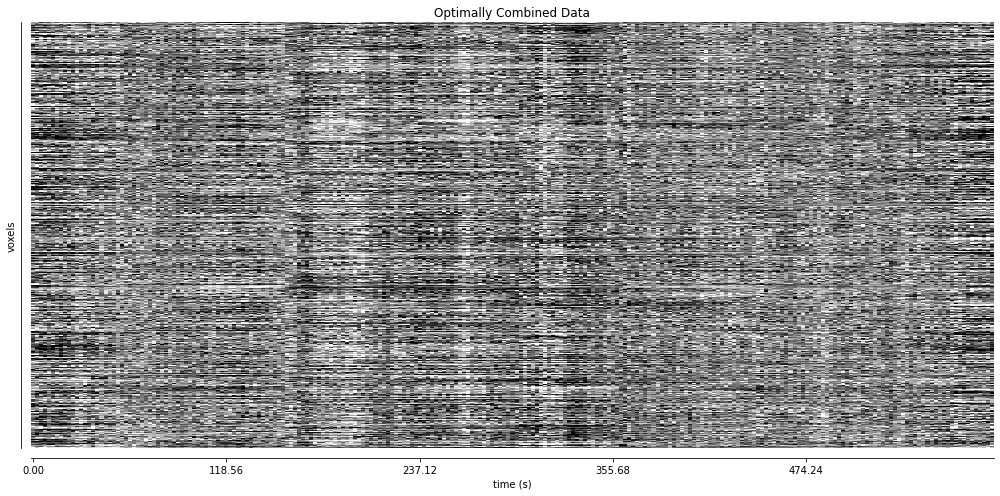

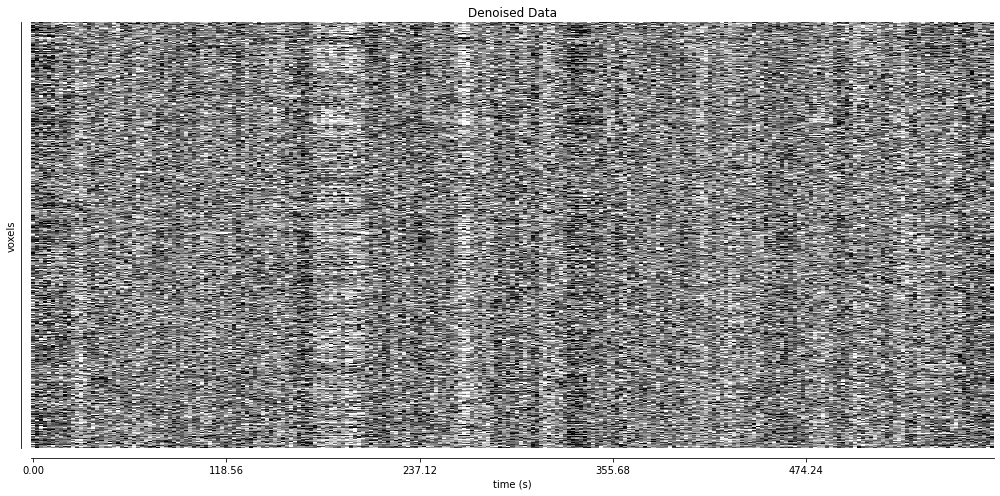

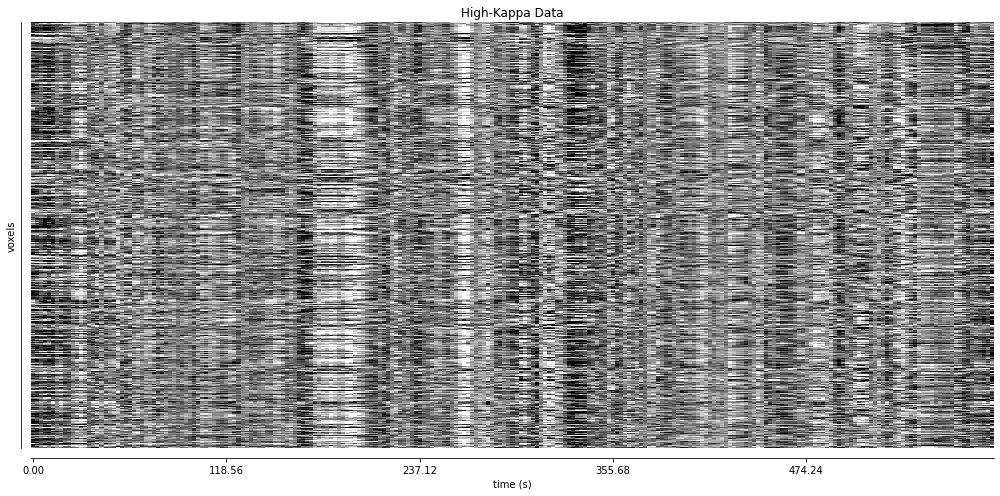

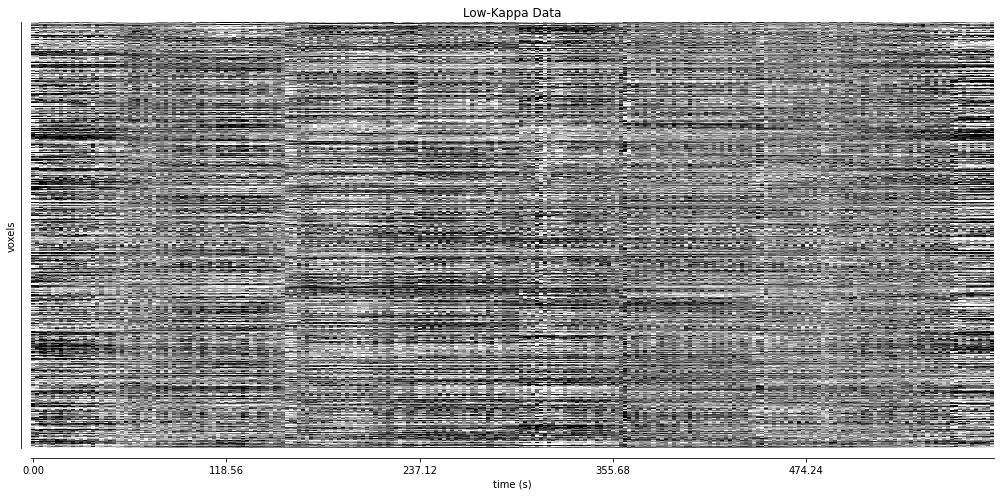

In [3]:
workflows.tedana_workflow(
    data_files, 
    echo_times, 
    out_dir=out_dir, 
    mask=mask_file, 
    prefix="sub-04570_task-rest_space-scanner",
    fittype="curvefit",
    tedpca="mdl",
)

In [4]:
out_files = sorted(glob(os.path.join(out_dir, "*")))
out_files = [os.path.basename(f) for f in out_files]
print("\n".join(out_files))

S0map.nii.gz
T2starmap.nii.gz
dataset_description.json
desc-ICAAccepted_components.nii.gz
desc-ICAAccepted_stat-z_components.nii.gz
desc-ICA_components.nii.gz
desc-ICA_decomposition.json
desc-ICA_mixing.tsv
desc-ICA_stat-z_components.nii.gz
desc-PCA_decomposition.json
desc-PCA_metrics.json
desc-PCA_metrics.tsv
desc-PCA_mixing.tsv
desc-PCA_stat-z_components.nii.gz
desc-adaptiveGoodSignal_mask.nii.gz
desc-optcomAccepted_bold.nii.gz
desc-optcomDenoised_bold.nii.gz
desc-optcomRejected_bold.nii.gz
desc-optcom_bold.nii.gz
desc-tedana_metrics.json
desc-tedana_metrics.tsv
figures
report.txt
report_old.txt
report_old_old.txt
sub-04570_task-rest_space-scanner_S0map.nii.gz
sub-04570_task-rest_space-scanner_T2starmap.nii.gz
sub-04570_task-rest_space-scanner_dataset_description.json
sub-04570_task-rest_space-scanner_desc-ICAAccepted_components.nii.gz
sub-04570_task-rest_space-scanner_desc-ICAAccepted_stat-z_components.nii.gz
sub-04570_task-rest_space-scanner_desc-ICA_components.nii.gz
sub-04570_tas

In [5]:
metrics = pd.read_table(os.path.join(out_dir, "sub-04570_task-rest_space-scanner_desc-tedana_metrics.tsv"))
metrics

,Component,kappa,rho,variance explained,normalized variance explained,countsigFT2,countsigFS0,dice_FT2,dice_FS0,countnoise,signal-noise_t,signal-noise_p,d_table_score,optimal sign,kappa ratio,d_table_score_scrub,classification,rationale
0,ICA_00,30.417130,34.420717,0.674374,0.008070,1323,2010,0.478425,0.466426,1173,-0.696351,4.869311e-01,19.9,-1,1.910682,NaN,rejected,I002;I003;I005
1,ICA_01,12.220744,19.495404,0.231883,0.003431,119,175,0.000000,0.091954,1014,-8.026410,8.172865e-14,36.9,-1,1.635226,NaN,rejected,I002;I003
2,ICA_02,26.785611,20.506268,1.162439,0.011656,1350,345,0.305124,0.000000,1392,0.000000,0.000000e+00,23.9,1,3.740027,13.4,rejected,I010
3,ICA_03,33.511583,38.792324,1.650813,0.015728,558,760,0.368087,0.372376,1129,3.290720,3.048399e-03,18.0,1,4.245308,NaN,rejected,I002;I003;I004
4,ICA_04,15.970316,14.648226,0.265177,0.003896,286,733,0.000000,0.322359,1370,-1.559052,1.213868e-01,37.7,1,1.430964,NaN,rejected,I003
5,ICA_05,15.009446,26.683061,0.453683,0.007334,144,375,0.313589,0.416000,819,0.468395,6.396425e-01,25.8,-1,2.604918,NaN,rejected,I002;I003
6,ICA_06,45.231538,11.599827,0.316397,0.004448,1885,411,0.601475,0.219697,973,13.026930,8.695417e-34,7.8,-1,0.602834,6.0,accepted,NaN
7,ICA_07,16.223844,16.520802,0.241199,0.003321,335,115,0.000000,0.000000,1433,0.000000,0.000000e+00,36.2,1,1.281235,NaN,rejected,I002
8,ICA_08,25.857471,14.721894,1.072140,0.007692,1055,189,0.341627,0.005666,1320,-0.379314,7.071318e-01,25.0,1,3.573317,NaN,rejected,I005
9,ICA_09,16.747598,17.300070,0.206451,0.002705,281,436,0.000000,0.133971,1459,0.000000,0.000000e+00,37.2,-1,1.062355,NaN,rejected,I002;I003


In [6]:
with open(os.path.join(out_dir, "sub-04570_task-rest_space-scanner_desc-tedana_metrics.json"), "r") as fo:
    data = json.load(fo)

first_five_keys = list(data.keys())[:5]
reduced_data = {k: data[k] for k in first_five_keys}
pprint(reduced_data)

{'Component': {'Description': 'The unique identifier of each component. This '
                              'identifier matches column names in the mixing '
                              'matrix TSV file.',
               'LongName': 'Component identifier'},
 'classification': {'Description': 'Classification from the manual '
                                   'classification procedure.',
                    'Levels': {'accepted': 'A BOLD-like component included in '
                                           'denoised and high-Kappa data.',
                               'ignored': 'A low-variance component included '
                                          'in denoised, but excluded from '
                                          'high-Kappa data.',
                               'rejected': 'A non-BOLD component excluded from '
                                           'denoised and high-Kappa data.'},
                    'LongName': 'Component classification'},
 'countnoise': 

In [7]:
df = pd.DataFrame.from_dict(data, orient="index")
df = df.fillna("n/a")
display(HTML(df.to_html()))

,Description,LongName,Levels,Units
Component,The unique identifier of each component. This identifier matches column names in the mixing matrix TSV file.,Component identifier,n/a,n/a
classification,Classification from the manual classification procedure.,Component classification,"{'accepted': 'A BOLD-like component included in denoised and high-Kappa data.', 'ignored': 'A low-variance component included in denoised, but excluded from high-Kappa data.', 'rejected': 'A non-BOLD component excluded from denoised and high-Kappa data.'}",n/a
countnoise,"Number of 'noise' voxels (voxels highly weighted for component, but not from clusters) from each component.",Noise voxel count,n/a,voxel
countsigFS0,Number of significant voxels from the cluster-extent thresholded S0 model F-statistic map for each component.,S0 model F-statistic map significant voxel count,n/a,voxel
countsigFT2,Number of significant voxels from the cluster-extent thresholded T2 model F-statistic map for each component.,T2 model F-statistic map significant voxel count,n/a,voxel
d_table_score,"Summary score compiled from five metrics, with smaller values (i.e., higher ranks) indicating more BOLD dependence and less noise.",Decision table score,n/a,arbitrary
d_table_score_scrub,"Summary score compiled from five metrics and computed from a subset of components, with smaller values (i.e., higher ranks) indicating more BOLD dependence and less noise.",Updated decision table score,n/a,arbitrary
dice_FS0,Dice value of cluster-extent thresholded maps of S0-model betas and F-statistics.,S0 model beta map-F-statistic map Dice similarity index,n/a,arbitrary
dice_FT2,Dice value of cluster-extent thresholded maps of T2-model betas and F-statistics.,T2 model beta map-F-statistic map Dice similarity index,n/a,arbitrary
kappa,"A pseudo-F-statistic indicating TE-dependence of the component. This metric is calculated by computing fit to the TE-dependence model at each voxel, and then performing a weighted average based on the voxel-wise weights of the component.",Kappa,n/a,arbitrary
